In [7]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import glob, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import cv2 as cv
import tifffile as tff
import math
import time
import itertools
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
warnings.filterwarnings('ignore')
import os
import random

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

In [84]:
n_classes = 2
batch_size = 16                         
img_size = 224                         # img width & heaight
input_shape = (img_size, img_size, 3)  # input shape for model (width, height, channel)
seed = random.randint(1, 1000)         # Taking random seed 1~1000 for shuffling and transformations.
learning_rate = 0.001
epochs = 100

label_classes = [0, 1]

classes = ['Benign','Malignant']

In [193]:
from tensorflow.keras.models import Sequential
from tensorflow import keras

def resNet50():    
    top_dropout_rate = 0.1
    
    model_input = keras.Input(shape=input_shape)
    
#     model_1 = keras.applications.MobileNet(input_shape=input_shape, include_top=False, weights="imagenet", input_tensor=model_input)
#     model_2 = keras.applications.VGG16(input_shape=input_shape, include_top=False, weights="imagenet", input_tensor=model_input)
#     model_3 = keras.applications.ResNet50(input_shape=input_shape, include_top=False, weights="imagenet", input_tensor=model_input)
#     model_4 = keras.applications.DenseNet121(input_shape=input_shape, include_top=False, weights="imagenet", input_tensor=model_input)
#     model_5 = keras.applications.InceptionV3(input_shape=input_shape, include_top=False, weights="imagenet", input_tensor=model_input)
#     model_6 = keras.applications.EfficientNetB0(input_shape=input_shape, include_top=False, weights="imagenet", input_tensor=model_input)
    
    for layer in model_3.layers[:]:
        layer._name = ('model_3' + layer.name)
        
    for layer in model_3.layers:
        layer.trainable = False
        
    model_3 = keras.layers.GlobalAveragePooling2D()(model_3.output)
    model_3 = keras.layers.Dense(256, activation='relu')(model_3)
    
    y = keras.layers.Dense(n_classes, activation='softmax')(model_3)
    models = keras.Model(model_input, y, name='ensemble')
    
    return models

In [99]:
# from tensorflow.keras.models import Sequential
# from tensorflow import keras

# def _make_model():    
#     top_dropout_rate = 0.1
    
#     model_input = keras.Input(shape=input_shape)
    
#     model_1 = keras.applications.MobileNet(input_shape=input_shape, include_top=False, weights="imagenet", input_tensor=model_input)
#     model_2 = keras.applications.VGG16(input_shape=input_shape, include_top=False, weights="imagenet", input_tensor=model_input)
#     model_3 = keras.applications.ResNet50(input_shape=input_shape, include_top=False, weights="imagenet", input_tensor=model_input)
#     model_4 = keras.applications.DenseNet121(input_shape=input_shape, include_top=False, weights="imagenet", input_tensor=model_input)
#     model_5 = keras.applications.InceptionV3(input_shape=input_shape, include_top=False, weights="imagenet", input_tensor=model_input)
#     model_6 = keras.applications.EfficientNetB0(input_shape=input_shape, include_top=False, weights="imagenet", input_tensor=model_input)
    
#     for layer in model_1.layers[:]:
#         layer._name = ('model1' + layer.name)
#     for layer in model_2.layers[:]:
#         layer._name = ('model2' + layer.name)
#     for layer in model_3.layers[:]:
#         layer._name = ('model3' + layer.name)
#     for layer in model_4.layers[:]:
#         layer._name = ('model4' + layer.name)
#     for layer in model_5.layers[:]:
#         layer._name = ('model5' + layer.name)
#     for layer in model_6.layers[:]:
#         layer._name = ('model6' + layer.name)
        
#     for layer in model_1.layers:
#         layer.trainable = False
        
#     for layer in model_2.layers:
#         layer.trainable = False
        
#     for layer in model_3.layers:
#         layer.trainable = False
        
#     for layer in model_4.layers:
#         layer.trainable = False 
    
#     for layer in model_5.layers:
#         layer.trainable = False

#     for layer in model_6.layers:
#         layer.trainable = False 
        
#     model1 = keras.layers.GlobalAveragePooling2D()(model_1.output)
#     model1 = keras.layers.Dense(256, activation='relu')(model1)
    
#     model2 = keras.layers.GlobalAveragePooling2D()(model_2.output)
#     model2 = keras.layers.Dense(256, activation='relu')(model2)
    
#     model3 = keras.layers.GlobalAveragePooling2D()(model_3.output)
#     model3 = keras.layers.Dense(256, activation='relu')(model3)
    
#     model4 = keras.layers.GlobalAveragePooling2D()(model_4.output)
#     model4 = keras.layers.Dense(256, activation='relu')(model4)
    
#     model5 = keras.layers.GlobalAveragePooling2D()(model_5.output)
#     model5 = keras.layers.Dense(256, activation='relu')(model5)

#     model6 = keras.layers.GlobalAveragePooling2D()(model_6.output)
#     model6 = keras.layers.Dense(256, activation='relu')(model6)

#     outputs = keras.layers.concatenate([model1, model2, model3, model4, model5, model6])
    
#     y = keras.layers.Dense(n_classes, activation='softmax')(outputs)
#     models = keras.Model(model_input, y, name='ensemble')
    
#     return models

In [194]:
# ensemble_model = _make_model()
# mobileNet_model.summary()
vgg16_model = vgg16()
# inceptionv3_model = inceptionV3()

In [185]:
main_folder = 'J:/Hafizur/Prostate_512_256'

train_path = (main_folder + '/train')
test_path = (main_folder + '/test')

In [186]:
# to visualize our preprocessed data 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [218]:
def data_preprocessing():
    global train_batches1, valid_batches1, test_batches4, test_label1

    train_datagen = ImageDataGenerator(
        height_shift_range=0.1,
        width_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        # build-in mobilenet.preprocess_input function for converting color imgs to Numpy tensor 
        preprocessing_function=tf.keras.applications.densenet.preprocess_input)
    
#     valid_datagen = ImageDataGenerator(
#         preprocessing_function = tf.keras.applications.inception_v3.preprocess_input) #validation_split=0.2
    
    test_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.densenet.preprocess_input)
    
    train_batches1 = train_datagen.flow_from_directory(directory=train_path, target_size=(img_size,img_size),
        batch_size=batch_size, seed=seed, class_mode='categorical', subset='training')
#     valid_batches1 = valid_datagen.flow_from_directory(       
#         directory=valid_path, target_size=(img_size,img_size), batch_size=batch_size, 
#         seed=seed, class_mode='categorical') #subset='validation'               
    test_batches4 = test_datagen.flow_from_directory(        
        directory=test_path, target_size=(img_size,img_size), batch_size=batch_size, 
        seed=seed, class_mode='categorical', shuffle=False)
    
#     test_label1 = test_batches1.classes
#     imgs1, labels1 = next(test_batches1)
#     plotImages((imgs1))    # using above plotImages function to visualize

In [219]:
data_preprocessing()

Found 2470 images belonging to 2 classes.
Found 772 images belonging to 2 classes.


In [44]:
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

# #     if normalize:
# #         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# #         print("Normalized confusion matrix")
# #     else:
# #         print('Confusion matrix, without normalization')

# #     print(cm)

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#             horizontalalignment="center",
#             color="white" if cm[i, j] > thresh else "black")

# #     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
# #     plt.savefig((title +'.png'), format='png', dpi=600) # saving img as png

In [71]:
learning_rate = 0.0001
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
              loss = "categorical_crossentropy", metrics = ['accuracy'])

In [73]:
callbacks = [
    keras.callbacks.ModelCheckpoint("J:/Hafizur/Each_Model/ensemble_model_weight_512_256.h5", verbose=1, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')]

history = ensemble_model.fit(train_batches1, steps_per_epoch=len(train_batches1),
                    epochs=100,
                    validation_data=(test_batches1), validation_steps=len(test_batches1),
                    callbacks=callbacks, verbose=1)

Epoch 1/100
155/155 [==============================] - 359s 2s/step - loss: 0.7938 - accuracy: 0.7531 - val_loss: 0.3324 - val_accuracy: 0.8718

Epoch 00001: val_loss improved from inf to 0.33242, saving model to J:/Hafizur/Each_Model\ensemble_model_weight_512_256.h5
Epoch 2/100
155/155 [==============================] - 42s 266ms/step - loss: 0.3150 - accuracy: 0.8852 - val_loss: 0.2863 - val_accuracy: 0.8938

Epoch 00002: val_loss improved from 0.33242 to 0.28630, saving model to J:/Hafizur/Each_Model\ensemble_model_weight_512_256.h5
Epoch 3/100
155/155 [==============================] - 41s 265ms/step - loss: 0.2609 - accuracy: 0.9013 - val_loss: 0.2322 - val_accuracy: 0.9145

Epoch 00003: val_loss improved from 0.28630 to 0.23223, saving model to J:/Hafizur/Each_Model\ensemble_model_weight_512_256.h5
Epoch 4/100
155/155 [==============================] - 41s 265ms/step - loss: 0.2705 - accuracy: 0.9040 - val_loss: 0.2625 - val_accuracy: 0.8990

Epoch 00004: val_loss did not improve

In [74]:
ensemble_model.save('J:/Hafizur/Each_Model/ResNet50_model_512_256.h5')

In [115]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# target = ['Benign','Malignant']

def Plot_Confusion_Matrix(cm, classes):
    
    print(cm)
    
    title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal', 'verticalalignment':'bottom'}
    axis_font = {'fontname':'Arial', 'size':'20', 'color':'black'}

    # figure = plot_confusion_matrix(cm, show_absolute=True, show_normed=True, colorbar=True)

    fig = plot_confusion_matrix(cm, show_absolute=True, show_normed=True, colorbar=False, class_names=classes, figsize=(7, 7))

    plt.rcParams.update({'font.size': 20})
    plt.title("Confusion Matrix", **title_font)
    plt.tick_params(labelsize=20, labelcolor= "black")
    plt.xlabel("Predicted Label", **axis_font)
    plt.ylabel("True Label", **axis_font)

    plt.show()
    
#     plt.savefig('G:/Prostate Cancer/Confusion_EML.png')

In [232]:
def make_confusion_matrix_(datagen, model, classes):
    
    predict_classes = model.predict(datagen)
    predicted_classes = np.argmax(predict_classes, axis=1)
    true_classes = datagen.classes
    print(classification_report(true_classes, predicted_classes))
    print('Accuracy on Test Data: %2.4f%%' % (accuracy_score(true_classes, predicted_classes)))
    cm = confusion_matrix(y_true=true_classes, y_pred=predicted_classes)
#     plot_confusion_matrix(cm=cm, classes=classes, title= ('Confusion Matrix of ' + model_name))
    
    Plot_Confusion_Matrix(cm, classes)
    
    return predict_classes, true_classes

In [29]:
# predict_classes, true_classes = make_confusion_matrix_(test_batches1, ensemble_model, classes)

In [186]:
# model_256_512 = keras.models.load_model('J:/Hafizur/pretrained_ensemble_256_512.h5')
# model_512 = keras.models.load_model('J:/Hafizur/pretrained_ensemble_512.h5')
# model_256 = keras.models.load_model('J:/Hafizur/pretrained_ensemble_256.h5')

In [33]:
# scores = model_512.evaluate(test_batches1, batch_size=2, verbose=1)

# print("%s: %.2f%%" %(model_512.metrics_names[1], scores[1]*100))

In [30]:
# predict_classes1, true_classes1 = make_confusion_matrix_(test_batches1, model_256_512, classes)

In [31]:
# predict_classes2, true_classes2 = make_confusion_matrix_(test_batches1, model_512, classes)

In [32]:
# predict_classes3, true_classes3 = make_confusion_matrix_(test_batches1, model_256, classes)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       386
           1       0.96      0.94      0.95       386

    accuracy                           0.95       772
   macro avg       0.95      0.95      0.95       772
weighted avg       0.95      0.95      0.95       772

Accuracy on Test Data: 0.9521%
[[371  15]
 [ 22 364]]


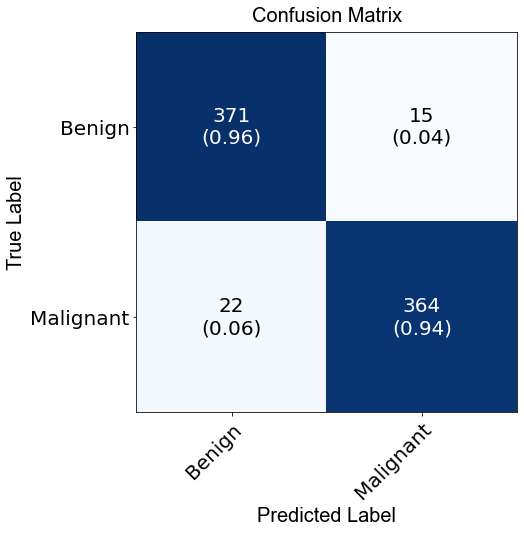

In [233]:
# predict_classes1, true_classes1 = make_confusion_matrix_(test_batches1, model_mobilenet_512_256, classes)
# predict_classes2, true_classes2 = make_confusion_matrix_(test_batches1, model_vgg16_512_256, classes)
# predict_classes3, true_classes3 = make_confusion_matrix_(test_batches2, model_resnet50_512_256, classes)
# predict_classes4, true_classes4 = make_confusion_matrix_(test_batches1, model_densenet121_512_256, classes)
# predict_classes5, true_classes5 = make_confusion_matrix_(test_batches1, model_inceptionv3_512_256, classes)
# predict_classes6, true_classes6 = make_confusion_matrix_(test_batches3, model_efficientB0_512_256, classes)
predict_classes7, true_classes7 = make_confusion_matrix_(test_batches2, model_ensemble_512_256, classes)

In [226]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def ROC_curve_show(y, pred_classes):
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], pred_classes[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["macro"], tpr["macro"], _ = roc_curve(y.ravel(), pred_classes.ravel())
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

#     ROC_curve_show_classes(fpr, tpr, roc_auc)
    
    return fpr, tpr, roc_auc

In [227]:
from tensorflow.keras.utils import to_categorical

new1 = to_categorical(true_classes1)
new2 = to_categorical(true_classes2)
new3 = to_categorical(true_classes3)
new4 = to_categorical(true_classes4)
new5 = to_categorical(true_classes5)
new6 = to_categorical(true_classes6)
new7 = to_categorical(true_classes7)

In [228]:
# ensemble_512_256_label = label_binarize(true_classes, classes=label_classes)
finetune_fpr1, finetune_tpr1, finetune_roc_auc1 = ROC_curve_show(new1, predict_classes1)
finetune_fpr2, finetune_tpr2, finetune_roc_auc2 = ROC_curve_show(new2, predict_classes2)
finetune_fpr3, finetune_tpr3, finetune_roc_auc3 = ROC_curve_show(new3, predict_classes3)
finetune_fpr4, finetune_tpr4, finetune_roc_auc4 = ROC_curve_show(new4, predict_classes4)
finetune_fpr5, finetune_tpr5, finetune_roc_auc5 = ROC_curve_show(new5, predict_classes5)
finetune_fpr6, finetune_tpr6, finetune_roc_auc6 = ROC_curve_show(new6, predict_classes6)
finetune_fpr7, finetune_tpr7, finetune_roc_auc7 = ROC_curve_show(new7, predict_classes7)

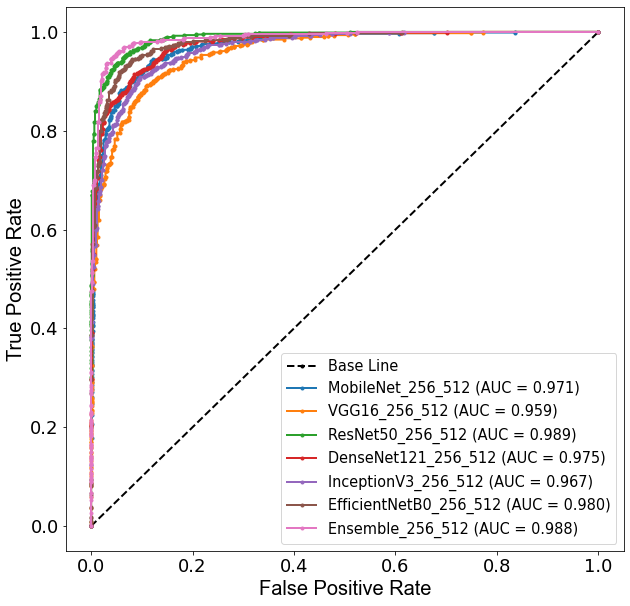

In [231]:
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal','verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'20', 'color':'black'}

fig = plt.figure(figsize=(10, 10))

# pyplot.title("ROC Curves", **title_font)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label ='Base Line', linewidth=2, marker='.')

plt.plot(finetune_fpr1["macro"], finetune_tpr1["macro"], label='MobileNet_256_512 (AUC = %0.3f)' % (finetune_roc_auc1["macro"]), linewidth=2, marker='.')
plt.plot(finetune_fpr2["macro"], finetune_tpr2["macro"], label='VGG16_256_512 (AUC = %0.3f)' % (finetune_roc_auc2["macro"]), linewidth=2, marker='.')
plt.plot(finetune_fpr3["macro"], finetune_tpr3["macro"], label='ResNet50_256_512 (AUC = %0.3f)' % (finetune_roc_auc3["macro"]), linewidth=2, marker='.')
plt.plot(finetune_fpr4["macro"], finetune_tpr4["macro"], label='DenseNet121_256_512 (AUC = %0.3f)' % (finetune_roc_auc4["macro"]), linewidth=2, marker='.')
plt.plot(finetune_fpr5["macro"], finetune_tpr5["macro"], label='InceptionV3_256_512 (AUC = %0.3f)' % (finetune_roc_auc5["macro"]), linewidth=2, marker='.')
plt.plot(finetune_fpr6["macro"], finetune_tpr6["macro"], label='EfficientNetB0_256_512 (AUC = %0.3f)' % (finetune_roc_auc6["macro"]), linewidth=2, marker='.')
plt.plot(finetune_fpr7["macro"], finetune_tpr7["macro"], label='Ensemble_256_512 (AUC = %0.3f)' % (finetune_roc_auc7["macro"]), linewidth=2, marker='.')

plt.xlabel('False Positive Rate', **axis_font)
plt.ylabel('True Positive Rate', **axis_font)
plt.tick_params(labelsize=18, labelcolor= "black")
plt.legend(loc="lower right", prop={"size":14.5})
plt.show()

# fig.savefig('J:\\Hafizur\\Compare_ROC_256_512.tiff', bbox_inches="tight", dpi=300)
